# CNN

Filtre / Noyaux d'image

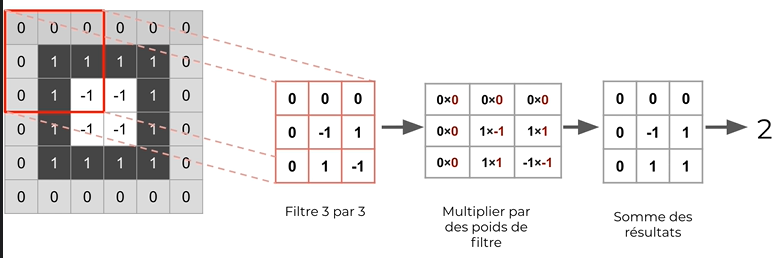

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import MaxPool2D, Dense, Reshape, Flatten, Dropout, LeakyReLU, BatchNormalization, Conv2D, Conv2DTranspose

# Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train = X_train / 255
X_test = X_test / 255

# Reshape (batch_size, x, y, deepth)
x_train = X_train.reshape(60000, 28, 28, 1)
x_test  = X_test.reshape(10000, 28, 28, 1)

In [3]:
# To categorial
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

y_cat_train[0].shape

(10,)

# Model

In [4]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(4,4),
                 input_shape=(28, 28, 1), 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

model.fit(x_train, y_cat_train, epochs=10, 
          validation_data=(x_test, y_cat_test), 
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1328 - accuracy: 0.9609 - val_loss: 0.0522 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0677 - val_accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0409 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0496 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0422 - val_accuracy: 0.9864


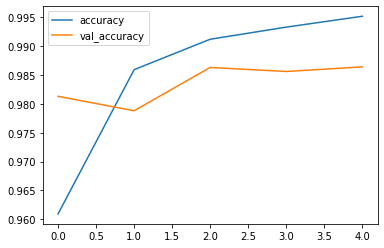

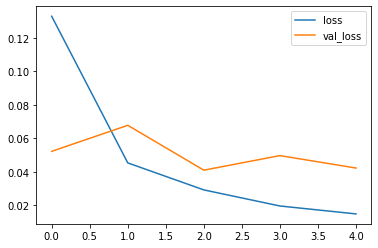

In [6]:
losses = pd.DataFrame(model.history.history)

losses[['accuracy','val_accuracy']].plot()

losses[['loss','val_loss']].plot()

# Predictions

metrics: 
 ['loss', 'accuracy']

model.evaluate:
[0.04220953583717346, 0.9864000082015991]

classification_report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




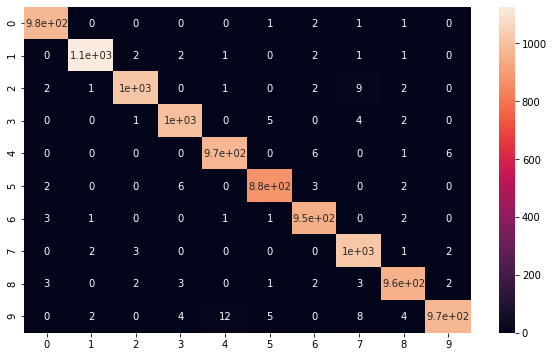

In [7]:
# 1. TEST 

print(f"metrics: \n {model.metrics_names}\n")

print(f"model.evaluate:\n{model.evaluate(x_test, y_cat_test, verbose=0)}\n")

predictions = np.argmax(model.predict(x_test), axis=1)

print(f"classification_report:\n{classification_report(y_test, predictions)}\n")

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751


array([7])

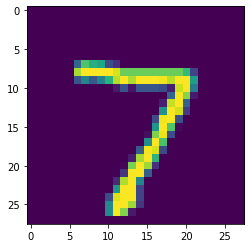

In [8]:
# 2. Predict the label of a new image

plt.imshow(x_test[0].reshape(28, 28))

# SHAPE --> (num_images, width, height, color_channels)
np.argmax(model.predict(x_test[0].reshape(1, 28, 28, 1)), axis=-1)
# model.predict(x_test[0].reshape(1, 28, 28, 1)).shape: (1, 10)

In [9]:
model.predict(x_test[0].reshape(1, 28, 28, 1)).shape

(1, 10)